In [ ]:
!pip install tensorflow opencv-python matplotlib

In [52]:
import tensorflow as tf
import os

In [53]:
# import libraries
import os
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
from matplotlib import rc
%matplotlib inline

from numpy.random import seed
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# unhide all rows and columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

# set random seed
seed(10)
tf.random.set_seed(10)

# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [54]:
# load hive data 17
dt17 = pd.read_csv("sample_data/Hive17.csv", delimiter=";", parse_dates=["DateTime"], index_col=["Hour"])
dt17.head()

,DateTime,T17,RH17,AT17,Tamb,RHamb,ATamb,T17-Tamb,AT17-ATamb
Hour,,,,,,,,,
1,2021-08-21 14:00:00,32.8,47,36.6,28.8,33,29.1,4.0,7.5
2,2021-08-21 15:00:00,33.3,46,37.1,28.8,36,29.5,4.5,7.6
3,2021-08-21 16:00:00,33.5,46,37.4,28.9,35,29.5,4.6,7.9
4,2021-08-21 17:00:00,33.8,49,38.5,28.5,36,29.1,5.3,9.3
5,2021-08-21 18:00:00,33.8,51,38.8,27.5,40,28.4,6.3,10.4


In [55]:
# load hive data 85
dt85 = pd.read_csv("sample_data/Hive85.csv", delimiter=";", parse_dates=["DateTime"], index_col=["Hour"])
dt85.head()

,DateTime,T85,RH85,AT85,Tamb,RHamb,ATamb,T85-Tamb,AT85-ATamb
Hour,,,,,,,,,
1,2021-08-21 14:00:00,36.3,78,48.4,28.8,33,29.1,7.5,19.3
2,2021-08-21 15:00:00,34.9,83,46.7,28.8,36,29.5,6.1,17.1
3,2021-08-21 16:00:00,34.1,87,45.9,28.9,35,29.5,5.2,16.4
4,2021-08-21 17:00:00,34.2,89,46.5,28.5,36,29.1,5.7,17.4
5,2021-08-21 18:00:00,33.9,90,46.2,27.5,40,28.4,6.4,17.8


In [56]:
# load hive data 36
dt85 = pd.read_csv("sample_data/Hive36.csv", delimiter=";", parse_dates=["DateTime"], index_col=["Hour"])
dt85.head()

,DateTime,T36,RH36,AT36,Tamb,RHamb,ATamb,T36-Tamb,AT36-ATamb
Hour,,,,,,,,,
1847,2021-06-11 12:00:00,29.2,66,34.3,23.6,49,24.3,5.6,10.0
1848,2021-06-11 13:00:00,27.3,71,31.9,25.1,43,25.5,2.2,6.4
1849,2021-06-11 14:00:00,28.3,69,33.2,25.7,40,26.0,2.6,7.3
1850,2021-06-11 15:00:00,29.3,67,34.5,24.6,49,25.6,4.7,8.9
1851,2021-06-11 16:00:00,30.1,66,35.5,23.4,51,24.2,6.7,11.3


In [57]:
# load hive data 85
dt85 = pd.read_csv("sample_data/Hive85.csv", delimiter=";", parse_dates=["DateTime"], index_col=["Hour"])
dt85.head()

,DateTime,T85,RH85,AT85,Tamb,RHamb,ATamb,T85-Tamb,AT85-ATamb
Hour,,,,,,,,,
1,2021-08-21 14:00:00,36.3,78,48.4,28.8,33,29.1,7.5,19.3
2,2021-08-21 15:00:00,34.9,83,46.7,28.8,36,29.5,6.1,17.1
3,2021-08-21 16:00:00,34.1,87,45.9,28.9,35,29.5,5.2,16.4
4,2021-08-21 17:00:00,34.2,89,46.5,28.5,36,29.1,5.7,17.4
5,2021-08-21 18:00:00,33.9,90,46.2,27.5,40,28.4,6.4,17.8


In [58]:
# load hive data 36
dt36 = pd.read_csv("sample_data/Hive36.csv", delimiter=";", parse_dates=["DateTime"], index_col=["Hour"])
dt36.head()

,DateTime,T36,RH36,AT36,Tamb,RHamb,ATamb,T36-Tamb,AT36-ATamb
Hour,,,,,,,,,
1847,2021-06-11 12:00:00,29.2,66,34.3,23.6,49,24.3,5.6,10.0
1848,2021-06-11 13:00:00,27.3,71,31.9,25.1,43,25.5,2.2,6.4
1849,2021-06-11 14:00:00,28.3,69,33.2,25.7,40,26.0,2.6,7.3
1850,2021-06-11 15:00:00,29.3,67,34.5,24.6,49,25.6,4.7,8.9
1851,2021-06-11 16:00:00,30.1,66,35.5,23.4,51,24.2,6.7,11.3


In [77]:
df17 = dt17[["T17","RH17","AT17","Tamb","RHamb","ATamb","T17-Tamb","AT17-ATamb"]]
df85 = dt85[["T85","RH85","AT85","Tamb","RHamb","ATamb","T85-Tamb","AT85-ATamb"]]
df36 = dt36[["T36","RH36","AT36","Tamb","RHamb","ATamb","T36-Tamb","AT36-ATamb"]]

In [60]:
df17.describe().round()

,T17,RH17,AT17,Tamb,RHamb,ATamb,T17-Tamb,AT17-ATamb
count,1847.0,1847.0,1847.0,1847.0,1847.0,1847.0,1847.0,1847.0
mean,25.0,67.0,28.0,18.0,68.0,19.0,6.0,9.0
std,7.0,12.0,9.0,6.0,20.0,6.0,4.0,5.0
min,8.0,44.0,6.0,7.0,17.0,6.0,-4.0,-6.0
25%,21.0,58.0,22.0,14.0,53.0,15.0,4.0,6.0
50%,26.0,67.0,29.0,18.0,71.0,18.0,6.0,10.0
75%,30.0,75.0,35.0,22.0,87.0,23.0,9.0,12.0
max,36.0,100.0,48.0,34.0,100.0,36.0,17.0,24.0


In [61]:
df85.describe().round()

,T85,RH85,AT85,Tamb,RHamb,ATamb,T85-Tamb,AT85-ATamb
count,6073.0,6073.0,6073.0,6073.0,6073.0,6073.0,6073.0,6073.0
mean,27.0,64.0,31.0,11.0,71.0,11.0,15.0,20.0
std,7.0,10.0,10.0,7.0,18.0,9.0,6.0,7.0
min,8.0,38.0,6.0,-6.0,17.0,-10.0,-4.0,3.0
25%,21.0,57.0,23.0,6.0,58.0,4.0,11.0,14.0
50%,27.0,63.0,30.0,11.0,74.0,10.0,15.0,20.0
75%,33.0,69.0,40.0,16.0,87.0,16.0,20.0,26.0
max,38.0,100.0,52.0,34.0,100.0,36.0,33.0,40.0


In [62]:
df36.describe().round()

,T36,RH36,AT36,Tamb,RHamb,ATamb,T36-Tamb,AT36-ATamb
count,4227.0,4227.0,4227.0,4227.0,4227.0,4227.0,4227.0,4227.0
mean,22.0,60.0,23.0,8.0,73.0,7.0,14.0,16.0
std,5.0,12.0,6.0,6.0,17.0,7.0,4.0,4.0
min,11.0,29.0,9.0,-6.0,25.0,-10.0,1.0,2.0
25%,19.0,52.0,19.0,4.0,61.0,2.0,11.0,13.0
50%,21.0,62.0,22.0,8.0,75.0,7.0,14.0,17.0
75%,25.0,69.0,26.0,12.0,87.0,12.0,17.0,20.0
max,35.0,90.0,44.0,27.0,100.0,27.0,23.0,28.0


In [63]:
# define training and testing datasets
print("Training dataset shape:", df85.loc[:].shape)
print("Testing dataset shape 1:", df17.loc[:].shape)
print("Testing dataset shape 2:", df36.loc[:].shape)
print("Testing dataset shape 3:", df85.loc[:].shape)

Training dataset shape: (6073, 8)
Testing dataset shape 1: (1847, 8)
Testing dataset shape 2: (4227, 8)
Testing dataset shape 3: (6073, 8)


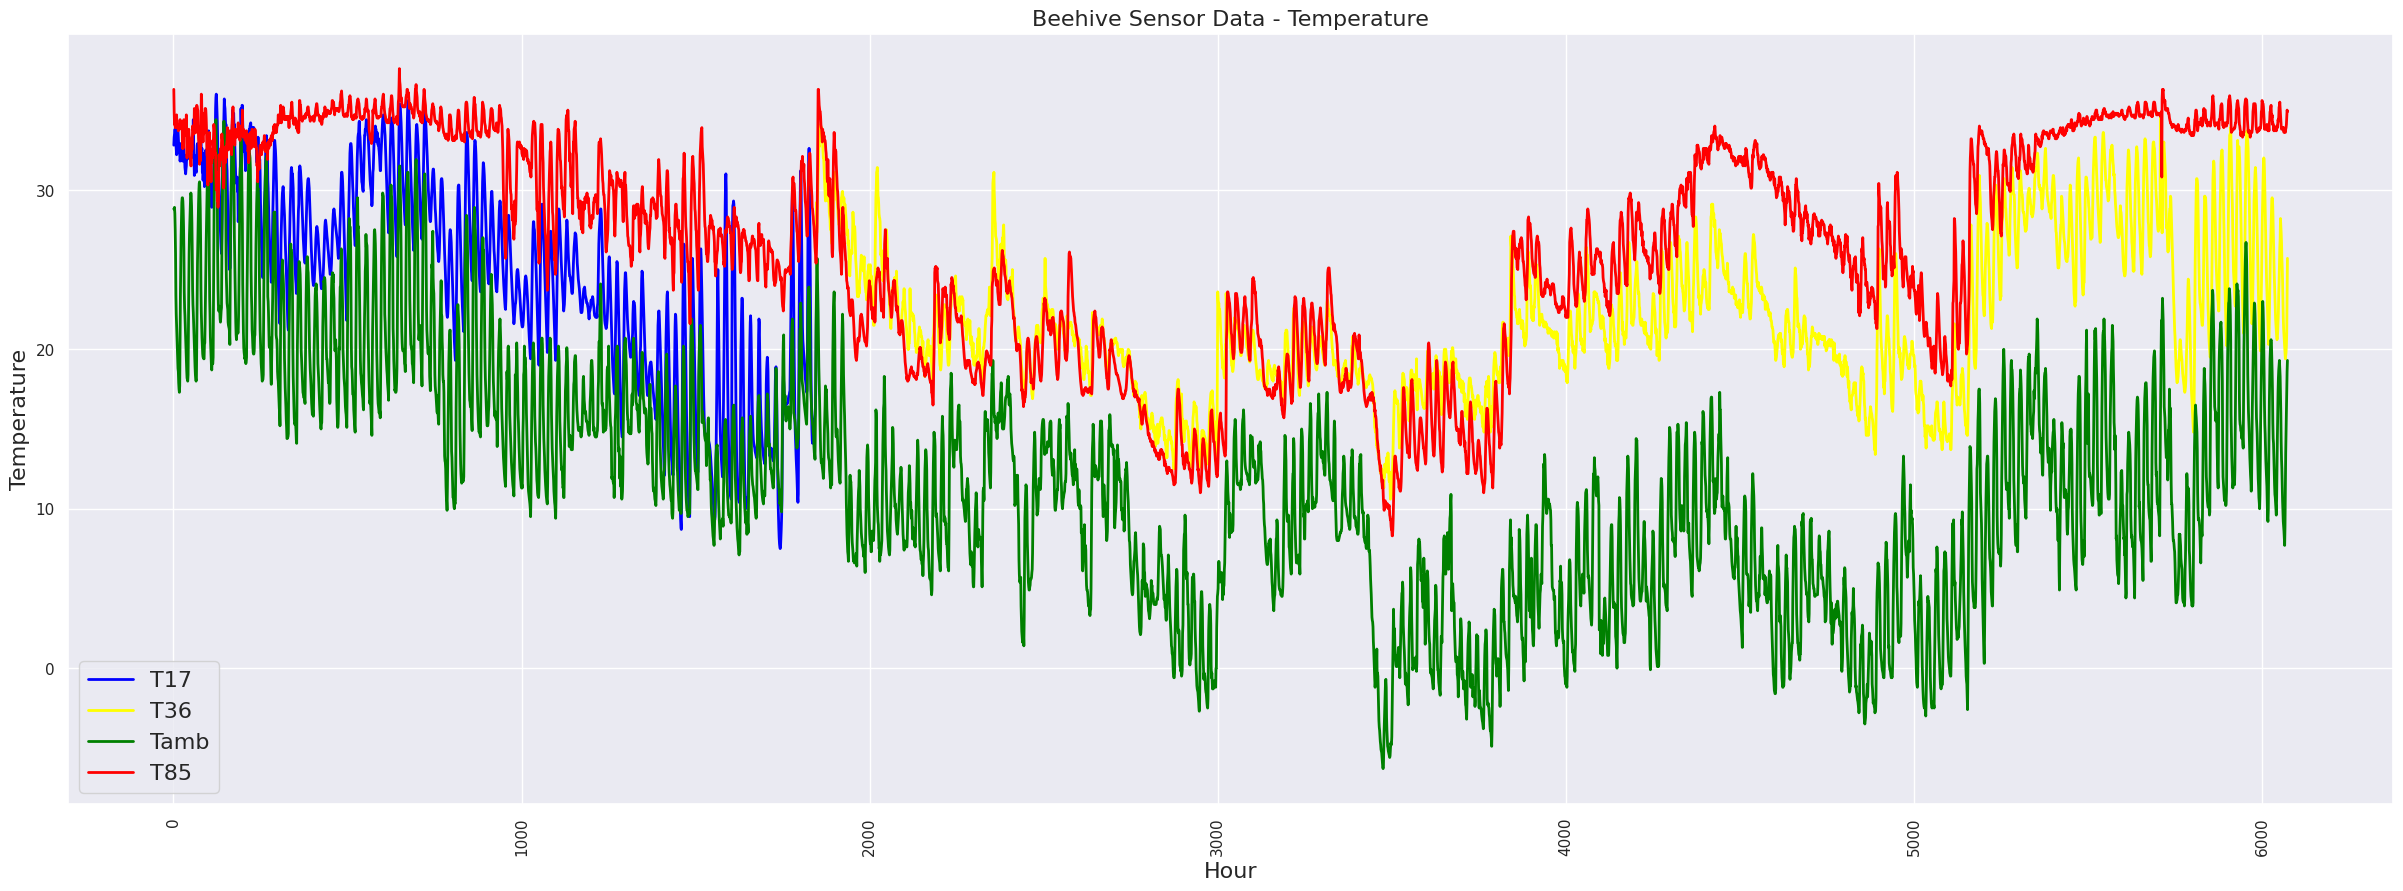

In [64]:
# plot temperature data of the hives
fig, ax = plt.subplots(figsize=(30,10), dpi=100)
ax.plot(df17.index, df17["T17"], label="T17", color="blue", animated = True, linewidth=2)
ax.plot(df36.index, df36["T36"], label="T36", color="yellow", animated = True, linewidth=2)
ax.plot(df85.index, df85["Tamb"], label="Tamb", color="green", animated = True, linewidth=2)
ax.plot(df85.index, df85["T85"], label="T85", color="red", animated = True, linewidth=2)
ax.set_title("Beehive Sensor Data - Temperature", fontsize=16)
#ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
plt.xlabel("Hour", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(rotation=90)
plt.legend(loc="lower left", fontsize=16)
plt.show()

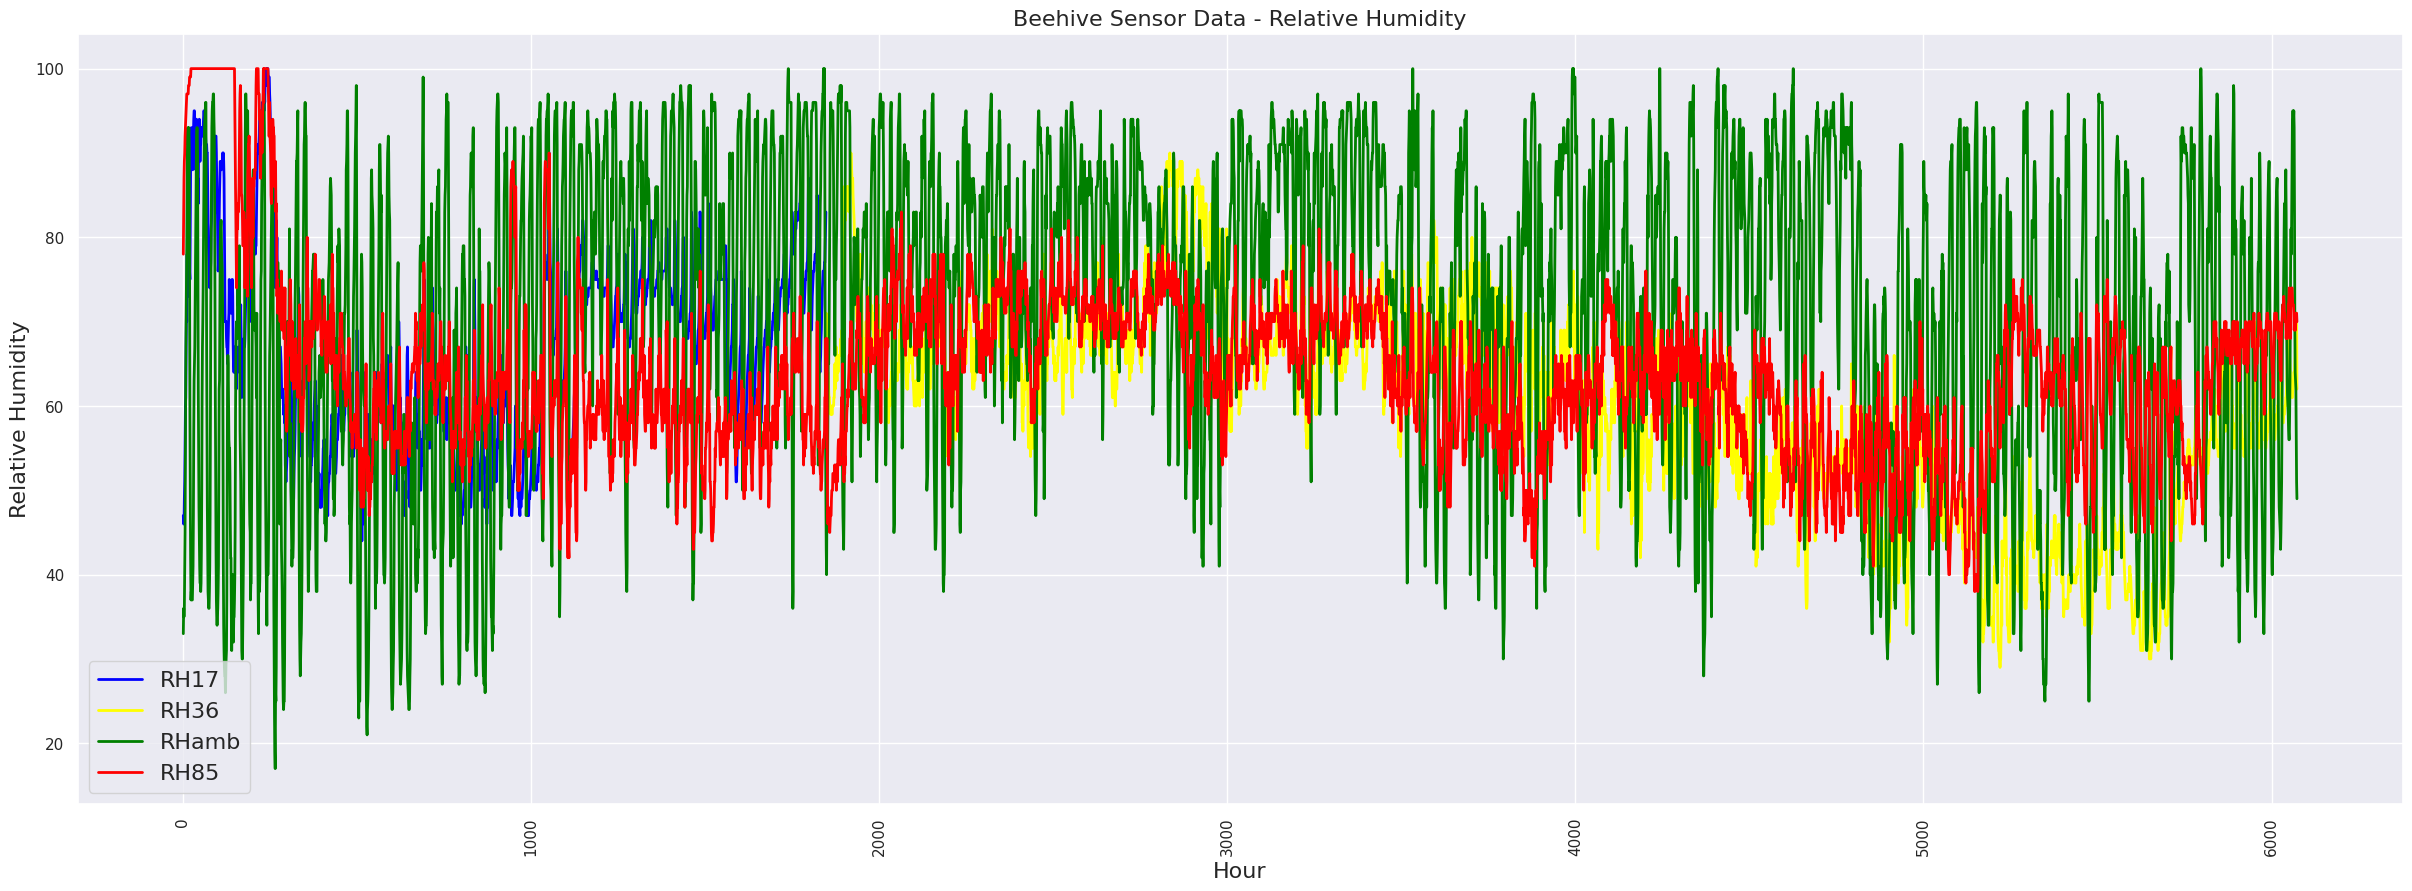

In [65]:
# plot relative humidity data of the hives
fig, ax = plt.subplots(figsize=(30,10), dpi=100)
ax.plot(df17.index, df17["RH17"], label="RH17", color="blue", animated = True, linewidth=2)
ax.plot(df36.index, df36["RH36"], label="RH36", color="yellow", animated = True, linewidth=2)
ax.plot(df85.index, df85["RHamb"], label="RHamb", color="green", animated = True, linewidth=2)
ax.plot(df85.index, df85["RH85"], label="RH85", color="red", animated = True, linewidth=2)
ax.set_title("Beehive Sensor Data - Relative Humidity", fontsize=16)
#ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
plt.xlabel("Hour", fontsize=16)
plt.ylabel("Relative Humidity", fontsize=16)
plt.xticks(rotation=90)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [66]:
# transform data from the time domain to the frequency domain using Fast Fourier Transform
train = df85
test17 = df17
test36 = df36
test85 = df85

train_fft = np.fft.fft(train)
test17_fft = np.fft.fft(test17)
test36_fft = np.fft.fft(test36)
test85_fft = np.fft.fft(test85)

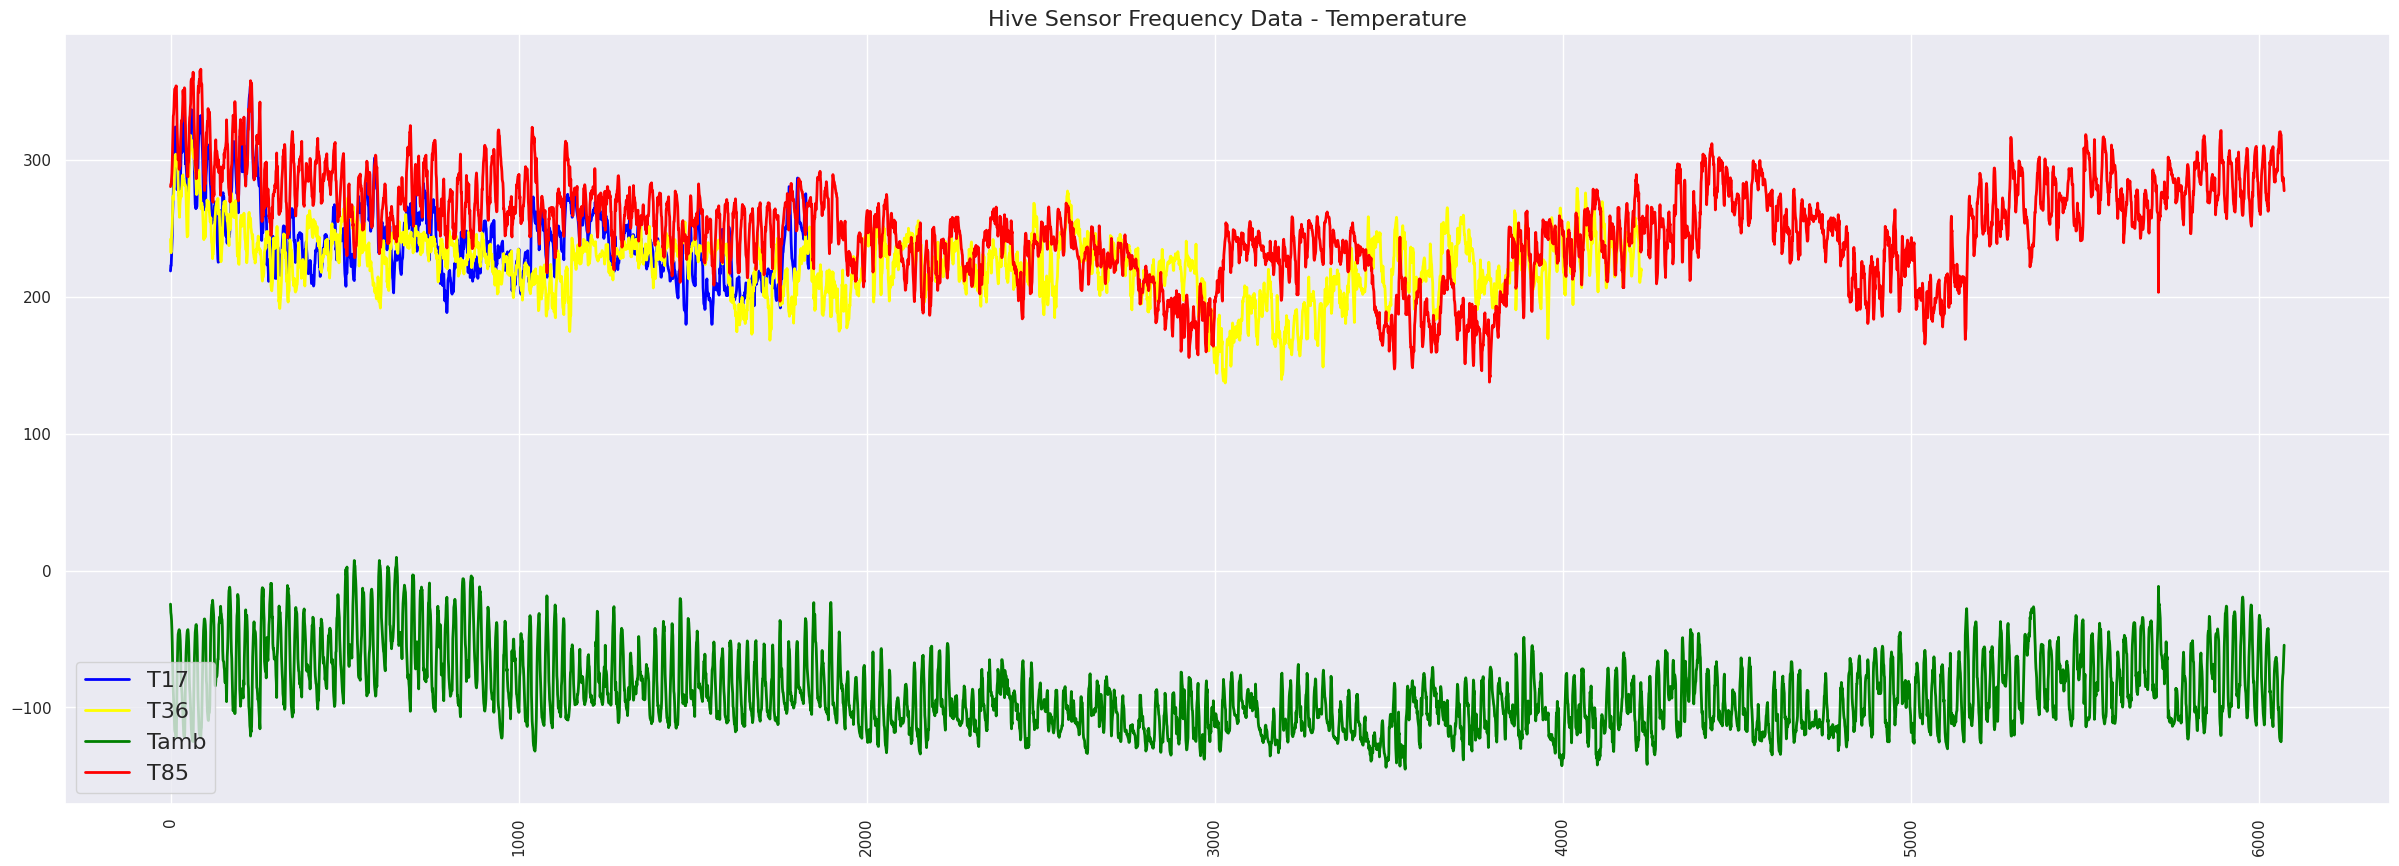

In [67]:
# temperature frequencies of the hives
fig, ax = plt.subplots(figsize=(30,10), dpi=100)
ax.plot(test17_fft[:,0], label="T17", color="blue", animated = True, linewidth=2)
ax.plot(test36_fft[:,0], label="T36", color="yellow", animated = True, linewidth=2)
ax.plot(train_fft[:,3], label="Tamb", color="green", animated = True, linewidth=2)
ax.plot(train_fft[:,0], label="T85", color="red", animated = True, linewidth=2)
ax.set_title("Hive Sensor Frequency Data - Temperature", fontsize=16)
#ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
#plt.xlabel("Date", fontsize=16)
#plt.ylabel("Temperature", fontsize=16)
plt.xticks(rotation=90)
plt.legend(loc="lower left", fontsize=16)
plt.show()

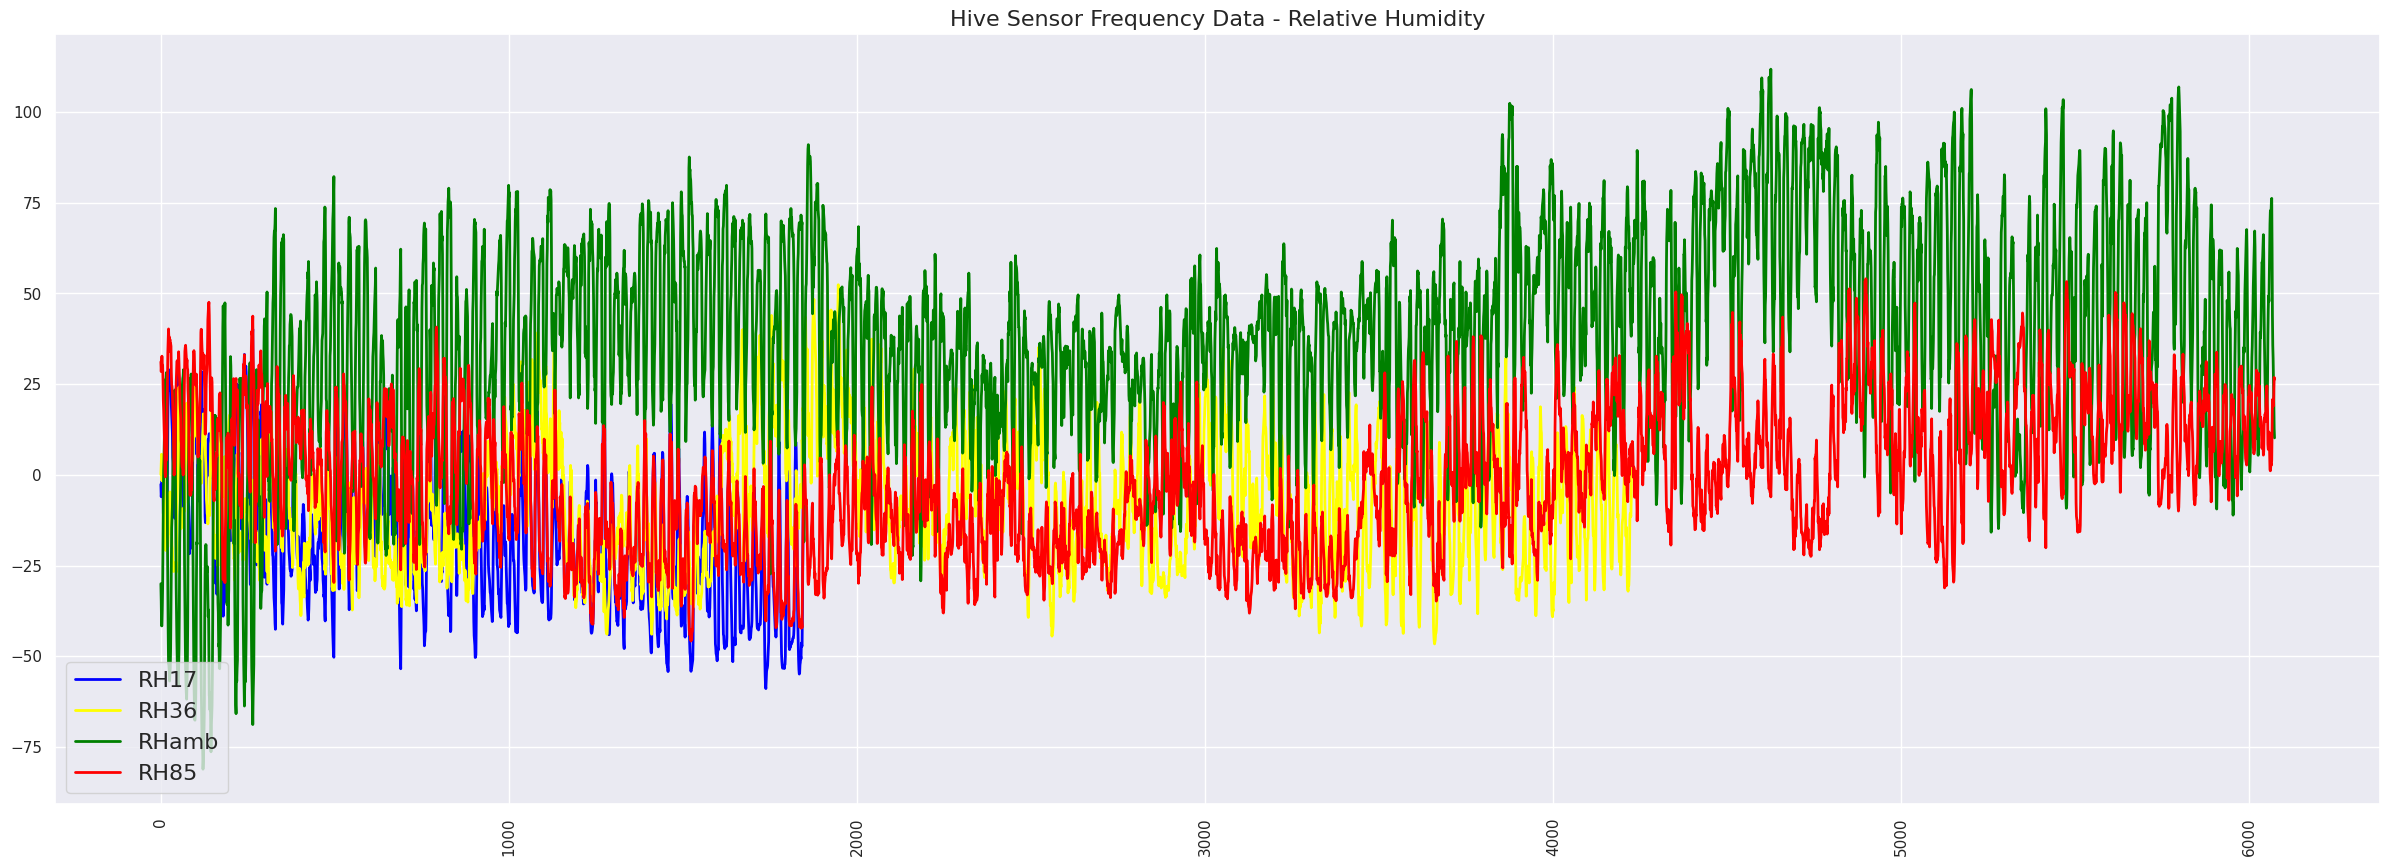

In [68]:
# relative humidity frequencies of the hives
fig, ax = plt.subplots(figsize=(30,10), dpi=100)
ax.plot(test17_fft[:,1], label="RH17", color="blue", animated = True, linewidth=2)
ax.plot(test36_fft[:,1], label="RH36", color="yellow", animated = True, linewidth=2)
ax.plot(train_fft[:,4], label="RHamb", color="green", animated = True, linewidth=2)
ax.plot(train_fft[:,1], label="RH85", color="red", animated = True, linewidth=2)
ax.set_title("Hive Sensor Frequency Data - Relative Humidity", fontsize=16)
#ax.xaxis.set_major_locator(md.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(md.DateFormatter("%m-%Y"))
#plt.xlabel("Date", fontsize=16)
#plt.ylabel("Temperature", fontsize=16)
plt.xticks(rotation=90)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [92]:
# transform data from the time domain to the frequency domain using Fast Fourier Transform
train = df85

test17 = df17
test36 = df36
test85 = df85

train_fft = np.fft.fft(train)
test17_fft = np.fft.fft(test17)
test36_fft = np.fft.fft(test36)
test85_fft = np.fft.fft(test85)

In [93]:
# normalize the data using Min-Max Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test85 = scaler.fit_transform(test85)
X_test17A = scaler.fit_transform(test17)
X_test17 = scaler.transform(test17)
X_test36B = scaler.fit_transform(test36)
X_test36 = scaler.transform(test36)



In [94]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test17 = X_test17.reshape(X_test17.shape[0], 1, X_test17.shape[1])
print("Test data shape:", X_test17.shape)
X_test36 = X_test36.reshape(X_test36.shape[0], 1, X_test36.shape[1])
print("Test data shape:", X_test36.shape)
X_test85 = X_test85.reshape(X_test85.shape[0], 1, X_test85.shape[1])
print("Test data shape:", X_test85.shape)

Training data shape: (6073, 1, 8)
Test data shape: (1847, 1, 8)
Test data shape: (4227, 1, 8)
Test data shape: (6073, 1, 8)


In [95]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

In [96]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 8)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 16)             1600      
                                                                 
 lstm_1 (LSTM)               (None, 4)                 336       
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 4)              0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 1, 4)              144       
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             1344      
                                                             

In [97]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, validation_split=0.05).history

Epoch 1/100
577/577 [==============================] - 11s 8ms/step - loss: 0.1926 - val_loss: 0.1006
Epoch 2/100
577/577 [==============================] - 5s 9ms/step - loss: 0.1100 - val_loss: 0.1088
Epoch 3/100
577/577 [==============================] - 3s 6ms/step - loss: 0.1034 - val_loss: 0.1049
Epoch 4/100
577/577 [==============================] - 4s 6ms/step - loss: 0.1014 - val_loss: 0.1051
Epoch 5/100
577/577 [==============================] - 5s 8ms/step - loss: 0.1003 - val_loss: 0.0996
Epoch 6/100
577/577 [==============================] - 4s 6ms/step - loss: 0.0993 - val_loss: 0.1003
Epoch 7/100
577/577 [==============================] - 3s 6ms/step - loss: 0.0974 - val_loss: 0.0926
Epoch 8/100
577/577 [==============================] - 4s 8ms/step - loss: 0.0951 - val_loss: 0.0951
Epoch 9/100
577/577 [==============================] - 4s 7ms/step - loss: 0.0931 - val_loss: 0.0876
Epoch 10/100
577/577 [==============================] - 4s 6ms/step - loss: 0.0912 - val_l

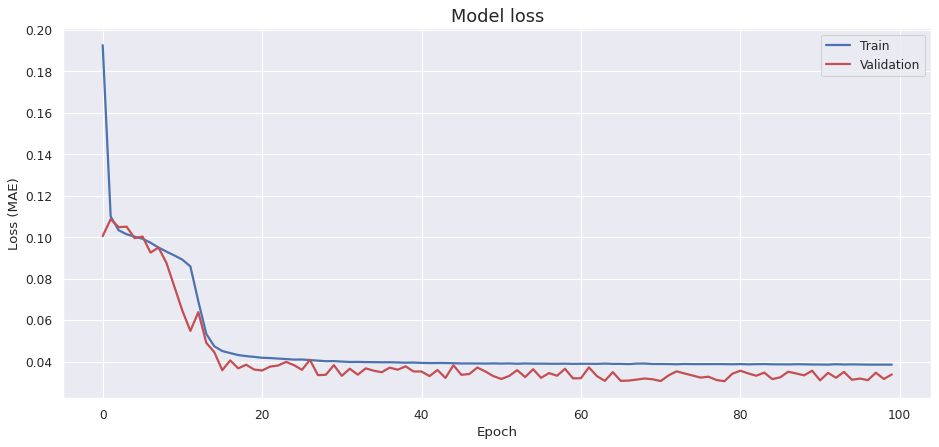

In [98]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MAE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

190/190 [==============================] - 2s 5ms/step


(0.0, 0.13)

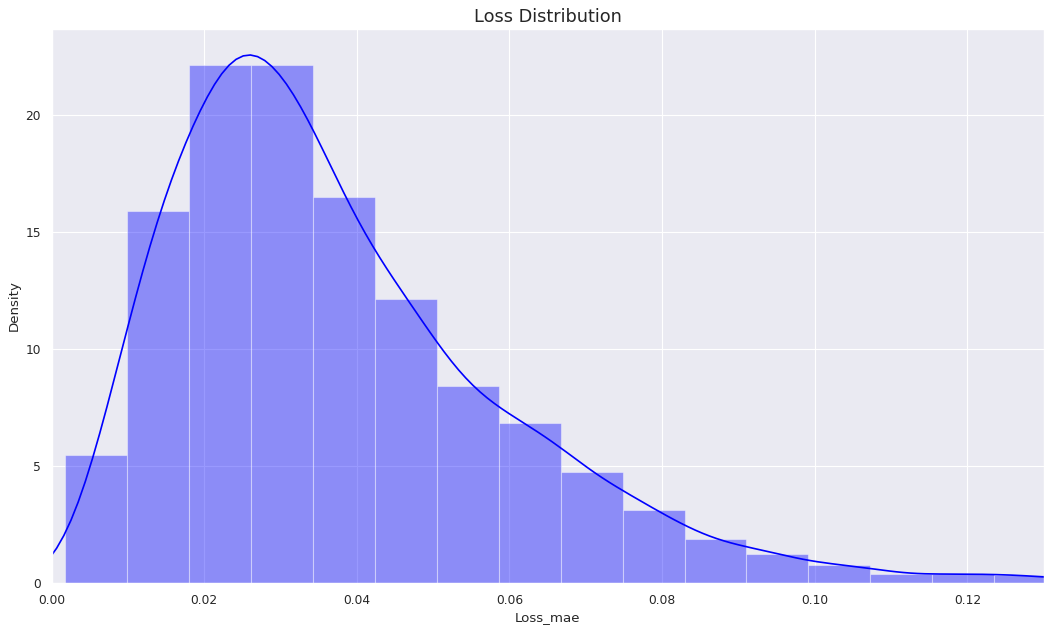

In [99]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.13])

In [100]:
# calculate the loss on the test set 1: hive 17
X_pred = model.predict(X_test17)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test17.columns)
X_pred.index = test17.index

scored = pd.DataFrame(index=test17.index)
Xtest17 = X_test17.reshape(X_test17.shape[0], X_test17.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest17), axis = 1)
scored['Threshold'] = 0.06
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

anomalies = scored[scored.Anomaly == True]
anomalies.tail(40)

58/58 [==============================] - 0s 4ms/step


,Loss_mae,Threshold,Anomaly
Hour,,,
1778,0.064293,0.06,True
1785,0.061540,0.06,True
1786,0.068220,0.06,True
1787,0.071049,0.06,True
1788,0.072113,0.06,True
1789,0.075348,0.06,True
1790,0.075788,0.06,True
1791,0.078301,0.06,True
1792,0.082445,0.06,True


from matplotlib import pyplot as plt
_df_24['Loss_mae'].plot(kind='hist', bins=20, title='Loss_mae')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Threshold']
  ys = series['Loss_mae']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Threshold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Threshold')
_ = plt.ylabel('Loss_mae')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Threshold']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Threshold'}, axis=1)
              .sort_values('Threshold', ascending=True))
  xs = counted['Threshold']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Threshold', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Threshold')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['Loss_mae'].plot(kind='line', figsize=(8, 4), title='Loss_mae')
plt.gca().spines[['top', 'right']].set_visible(False)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000')])

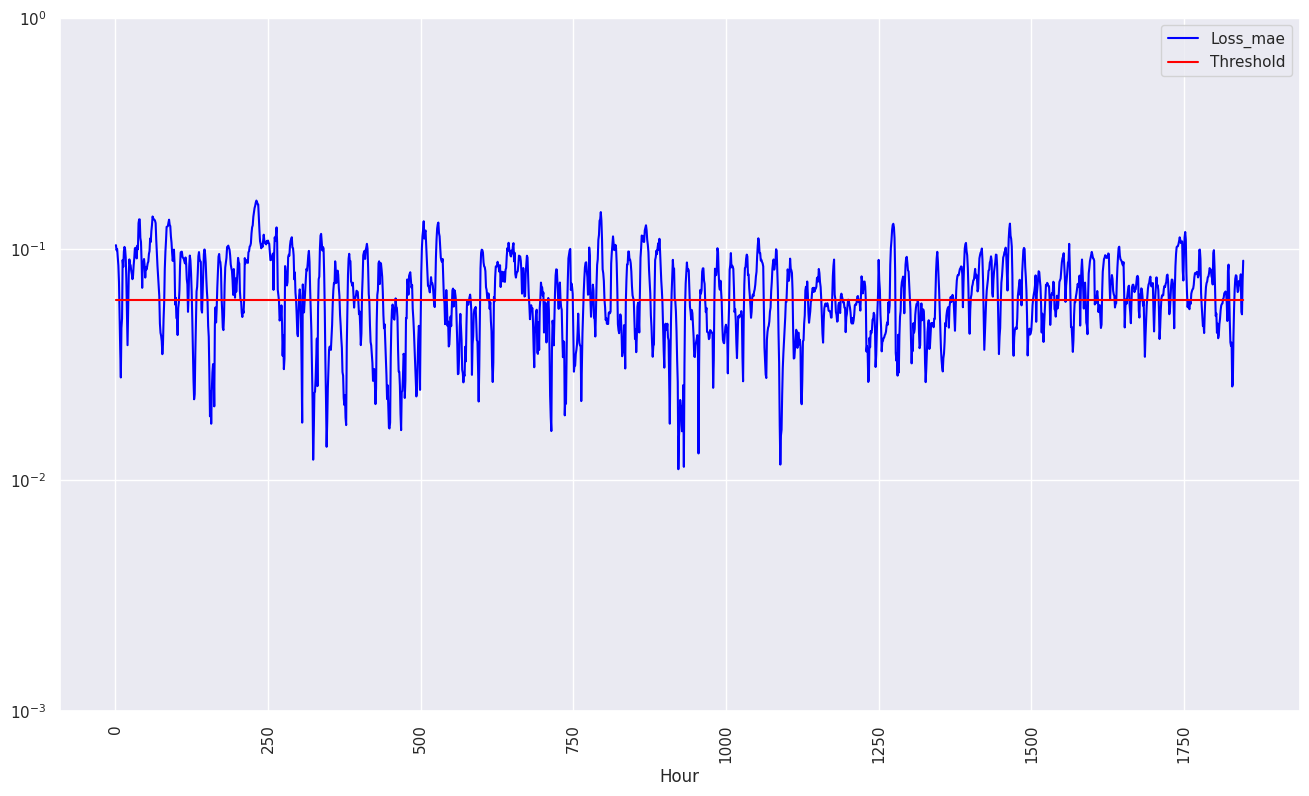

In [101]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-3,1e-0], color=['blue','red'])
plt.xticks(rotation=90)

In [102]:
# calculate the loss on the test set 2: hive 36
X_pred = model.predict(X_test36)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test36.columns)
X_pred.index = test36.index

scored = pd.DataFrame(index=test36.index)
Xtest36 = X_test36.reshape(X_test36.shape[0], X_test36.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest36), axis = 1)
scored['Threshold'] = 0.06
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

anomalies = scored[scored.Anomaly == True]
anomalies.head(20)

133/133 [==============================] - 0s 2ms/step


,Loss_mae,Threshold,Anomaly
Hour,,,
1853,0.072035,0.06,True
1854,0.083274,0.06,True
1855,0.079022,0.06,True
1856,0.082668,0.06,True
1857,0.092558,0.06,True
1858,0.103626,0.06,True
1859,0.120004,0.06,True
1860,0.126154,0.06,True
1861,0.125140,0.06,True


(array([1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

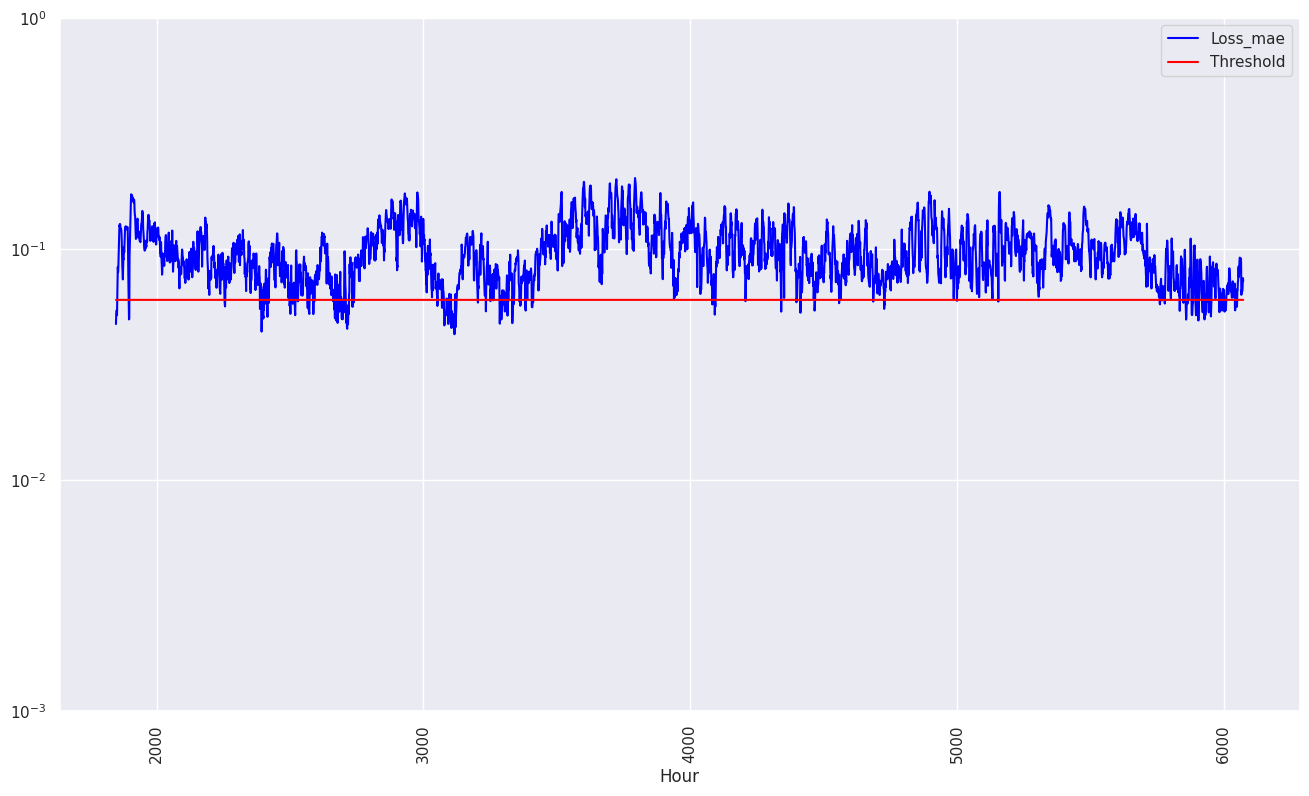

In [103]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-3,1e-0], color=['blue','red'])
plt.xticks(rotation=90)

In [104]:
# calculate the loss on the test set 2: hive 36
X_pred = model.predict(X_test85)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test85.columns)
X_pred.index = test85.index

scored = pd.DataFrame(index=test85.index)
Xtest85 = X_test85.reshape(X_test85.shape[0], X_test85.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest85), axis = 1)
scored['Threshold'] = 0.06
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

anomalies = scored[scored.Anomaly == True]
anomalies.head(20)

190/190 [==============================] - 1s 4ms/step


,Loss_mae,Threshold,Anomaly
Hour,,,
5,0.062481,0.06,True
6,0.067812,0.06,True
7,0.080996,0.06,True
8,0.096687,0.06,True
9,0.110516,0.06,True
10,0.116421,0.06,True
11,0.125787,0.06,True
12,0.136242,0.06,True
13,0.144248,0.06,True


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

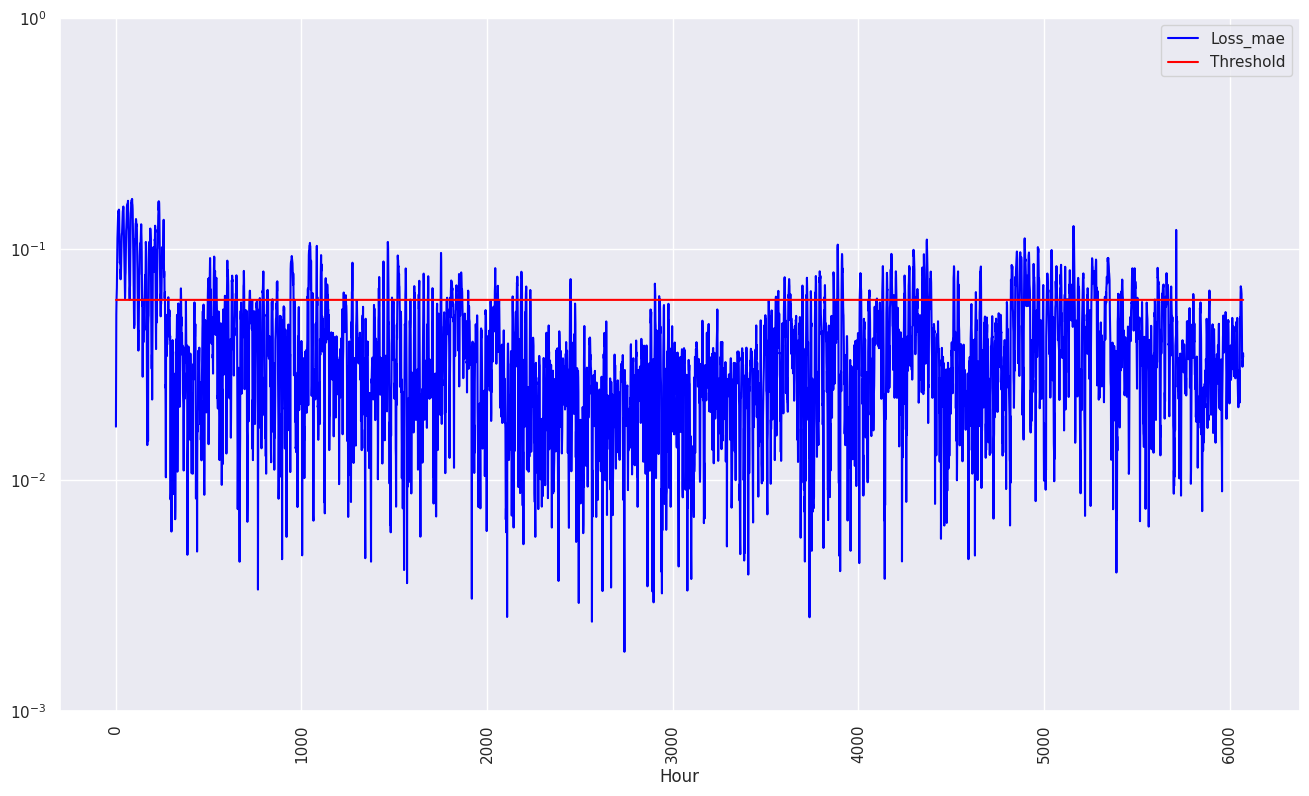

In [105]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-3,1e-0], color=['blue','red'])
plt.xticks(rotation=90)